In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
NUM_EPOCH = 500

In [36]:
def format_df_text_analysis(df):
    df = df.drop(columns=['Address', 'Description', 'Clean Description','Unnamed: 0'])
    df = df.astype('float64')
    # test
    df = df.drop(columns=['YearBuilt', 'ParkingPrice'])
    return df    
    
def format_df(df):
    df = df.drop(columns=['Address', 'Description'])
#     df = df.drop(columns=['Address', 'Description', 'Clean Description'])
    df = df.astype('float64')
    # test
    df = df.drop(columns=['YearBuilt', 'ParkingPrice'])
    
    return df
      
def load_file_text_analysis():
    all_file = 'data_with_text.csv'
    df = pd.read_csv(all_file, header=0, sep=',', quotechar='"', dtype=object, keep_default_na=True)
    df = format_df_text_analysis(df)
    df_y = df['Price']
    df = df.drop(columns=['Price'])
    X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.1, random_state=15388)
    return X_train, X_test, y_train, y_test    

def load_file():
    train_file = 'all_train.csv'
    test_file = 'all_test.csv'
    
    df_train = pd.read_csv(train_file, header=0, sep=',', quotechar='"', dtype=object, keep_default_na=True)
    df_test = pd.read_csv(test_file, header=0, sep=',', quotechar='"', dtype=object, keep_default_na=True)
    
    df_train = format_df(df_train)
    df_test = format_df(df_test)
    
    y_train = df_train['Price']
    X_train = df_train.drop(columns=['Price'])
    
    y_test = df_test['Price']
    X_test = df_test.drop(columns=['Price'])
    
    return X_train, X_test, y_train, y_test
    
def initialize_model(num_feature):
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=num_feature))
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
#     model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
#     model.compile(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_absolute_error')
    return model

def train_model(model, X_train, y_train):
    model.fit(x=X_train, y=y_train, validation_split=0.2, epochs=NUM_EPOCH, verbose=0)
#     model.summary()
    return model
    
def predict_model(model, X_test):
    return model.predict(X_test)
    

    
# X_train, X_test, y_train, y_test = load_file()
X_train, X_test, y_train, y_test = load_file_text_analysis()
num_feature = len(X_train.columns)

print('#features = %d' % (num_feature))

model = initialize_model(num_feature)
model = train_model(model, X_train, y_train)

y_predict = predict_model(model, X_test)
y_actual = y_test.values

print('Done')

#features = 33
Done


0.6571420764671521


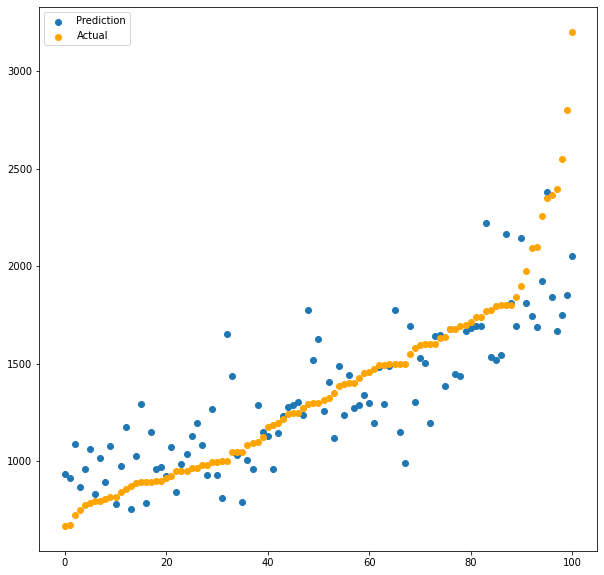

In [38]:
def plot_result(y_predict, y_actual, plot_error=False, tolerence=0.2):
    x = np.arange(len(y_predict))
    plt.figure(figsize=(10,10))
    
    y_actual_index = y_actual.argsort()
    sorted_y_predict = y_predict[y_actual_index]
    sorted_y_actual = y_actual[y_actual_index]
    
    plt.scatter(x, sorted_y_predict, label='Prediction')
    plt.scatter(x, sorted_y_actual, color='orange', label='Actual')
    plt.legend()
    plt.plot()
    if plot_error:
        y_error = tolerence * sorted_y_actual
        plt.errorbar(x, sorted_y_actual, yerr = y_error, fmt ='none', color='orange')

def r2(y_predict, y_actual):
    print(r2_score(y_true=y_actual, y_pred=y_predict))
    
plot_result(y_predict, y_actual, plot_error=False)
r2(y_predict, y_actual)

0.7326732673267327


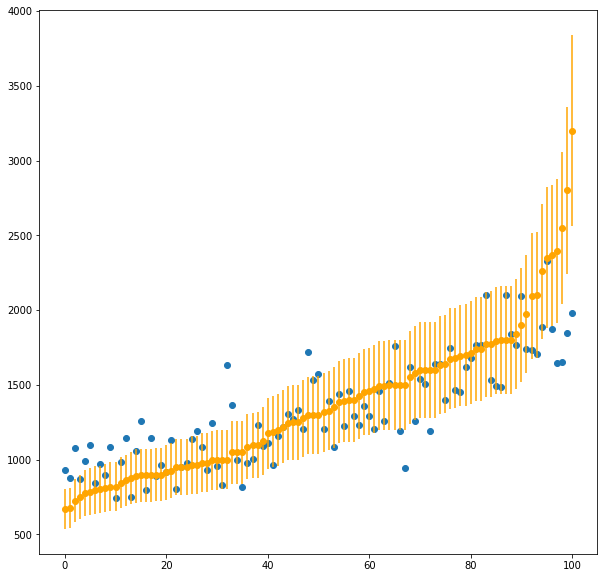

In [12]:
# suppose a certain difference tolerence, calculate accurancy
TOLERENCE = 0.2
def calculate_accuracy(y_actual, y_predict):
    accurate_count = 0
    for actual, predict in zip(y_actual, y_predict):
        if predict > (1 - TOLERENCE) * actual and predict < (1 + TOLERENCE) * actual:
            accurate_count += 1
    print(accurate_count / len(y_actual))
calculate_accuracy(y_actual, y_predict)
plot_result(y_predict, y_actual, plot_error=True, tolerence=TOLERENCE)